In [38]:
import pandas as pd
from os import system
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Web scraping data using pandas

In [1]:
import pandas as pd

url = 'https://www.basketball-reference.com/leagues/NBA_2023_per_game.html'
html = pd.read_html(url, header = 0)

'''df[0] simply refers to the first dataframe: This function searches for <table> elements and only for <tr> and <th> rows 
and <td> elements within each <tr> or <th> element in the table. 
<td> stands for “table data”.'''

df2023 = html[0]

df2023[60:65]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
60,59,Dillon Brooks,SG,27,MEM,26,26,31.0,6.8,16.6,...,.776,0.8,2.9,3.7,2.9,0.8,0.2,1.8,3.2,18.3
61,60,Bruce Brown,PG,26,DEN,29,17,30.2,4.4,9.0,...,.800,1.0,3.4,4.3,4.3,1.0,0.6,1.7,2.5,11.2
62,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
63,61,Greg Brown III,PF,21,POR,9,0,7.3,0.9,2.1,...,.250,0.2,1.0,1.2,0.0,0.4,0.6,0.6,0.9,2.1
64,62,Jaylen Brown,SF,26,BOS,29,29,35.8,9.9,19.9,...,.812,1.1,6.4,7.4,3.5,1.2,0.5,3.2,2.8,26.4


As there're some rows repeating the header, we remvoe it below:

In [2]:
#Data cleaning
raw = df2023.drop(df2023[df2023.Age == 'Age'].index)
raw[58:63]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
60,59,Dillon Brooks,SG,27,MEM,26,26,31.0,6.8,16.6,...,.776,0.8,2.9,3.7,2.9,0.8,0.2,1.8,3.2,18.3
61,60,Bruce Brown,PG,26,DEN,29,17,30.2,4.4,9.0,...,.800,1.0,3.4,4.3,4.3,1.0,0.6,1.7,2.5,11.2
63,61,Greg Brown III,PF,21,POR,9,0,7.3,0.9,2.1,...,.250,0.2,1.0,1.2,0.0,0.4,0.6,0.6,0.9,2.1
64,62,Jaylen Brown,SF,26,BOS,29,29,35.8,9.9,19.9,...,.812,1.1,6.4,7.4,3.5,1.2,0.5,3.2,2.8,26.4
65,63,Kendall Brown,SG,19,IND,6,0,6.7,0.7,1.2,...,.500,0.3,0.7,1.0,0.5,0.7,0.0,0.3,1.5,1.5


In [9]:
raw.shape

(490, 30)

In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 513
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      490 non-null    object
 1   Player  490 non-null    object
 2   Pos     490 non-null    object
 3   Age     490 non-null    object
 4   Tm      490 non-null    object
 5   G       490 non-null    object
 6   GS      490 non-null    object
 7   MP      490 non-null    object
 8   FG      490 non-null    object
 9   FGA     490 non-null    object
 10  FG%     483 non-null    object
 11  3P      490 non-null    object
 12  3PA     490 non-null    object
 13  3P%     454 non-null    object
 14  2P      490 non-null    object
 15  2PA     490 non-null    object
 16  2P%     476 non-null    object
 17  eFG%    483 non-null    object
 18  FT      490 non-null    object
 19  FTA     490 non-null    object
 20  FT%     447 non-null    object
 21  ORB     490 non-null    object
 22  DRB     490 non-null    ob

In [12]:
# Check for porpotion of missing values
missing_values = raw.isnull().sum()
missing_values_per = (raw.isnull().sum() / raw.isnull().count())
pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage'])
r = pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage']).reset_index()
r

,index,Count_of_Missing,Percentage
0,Rk,0,0.000000
1,Player,0,0.000000
2,Pos,0,0.000000
3,Age,0,0.000000
4,Tm,0,0.000000
5,G,0,0.000000
6,GS,0,0.000000
7,MP,0,0.000000
8,FG,0,0.000000
9,FGA,0,0.000000


* FG%	Field Goal Percentage
* 3P%	FG% on 3-Pt FGAs.
* eFG%	Effective Field Goal Percentage (Note: This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.)
* 2P%	FG% on 2-Pt FGAs.
* FT%	Free Throw Percentage
# Fill missing value with 0

In [13]:
df = raw.fillna(0)
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [16]:
#drop ranking
df = df.drop(['Rk'], axis=1) #axis=1 is to drop by column
df.tail()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
509,Delon Wright,PG,30,WAS,4,0,22.8,2.5,6.0,.417,...,.600,1.0,1.5,2.5,3.3,2.8,1.0,1.0,1.3,6.5
510,McKinley Wright IV,PG,24,DAL,2,0,4.0,0.5,2.0,.250,...,0,1.0,0.5,1.5,1.5,0.5,0.0,0.0,0.0,1.0
511,Thaddeus Young,PF,34,TOR,27,9,17.2,2.3,4.2,.540,...,.813,1.7,2.0,3.7,1.8,1.1,0.1,0.8,1.7,5.1
512,Trae Young,PG,24,ATL,27,27,35.7,8.7,21.2,.409,...,.895,0.7,2.0,2.7,9.9,0.7,0.1,3.8,1.5,27.0
513,Ivica Zubac,C,25,LAC,30,30,29.5,4.0,6.4,.617,...,.667,3.3,7.5,10.8,1.1,0.4,1.6,2.1,3.1,10.1


In [4]:
#write to csv
df.to_csv(r'C:/Users/Python/portfolio/nba2023.csv', index = False)

In [5]:
#read data back in
# address = "C:/Users/Python/portfolio/"
df = pd.read_csv('nba2023.csv',header=0)

In [37]:
pd.reset_option('display.max_rows')

In [38]:
# if we want to examine the whole dataset
pd.set_option('display.max_columns', df.shape[0]+1)#or display.max_rows
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,12,0,20.4,3.0,7.7,0.391,0.4,2.3,0.179,2.6,5.3,0.484,0.418,2.3,2.8,0.848,2.0,5.0,7.0,1.3,0.2,0.6,1.3,1.6,8.8
1,Steven Adams,C,29,MEM,26,26,26.5,3.6,5.9,0.604,0.0,0.0,0.000,3.6,5.9,0.608,0.604,0.9,2.8,0.333,4.7,5.5,10.2,2.3,0.8,1.2,2.1,2.5,8.1
2,Bam Adebayo,C,25,MIA,28,28,35.0,8.1,15.4,0.528,0.0,0.4,0.100,8.1,15.1,0.538,0.529,4.4,5.2,0.841,2.4,7.4,9.8,3.3,1.0,0.7,3.1,3.3,20.7
3,Ochai Agbaji,SG,22,UTA,13,0,8.8,1.2,2.8,0.432,0.3,1.3,0.235,0.9,1.5,0.600,0.486,0.3,0.7,0.444,0.5,0.8,1.2,0.2,0.1,0.0,0.0,0.9,3.1
4,Santi Aldama,PF,22,MEM,28,16,24.5,3.5,7.5,0.469,1.3,3.7,0.359,2.2,3.9,0.574,0.557,1.7,2.2,0.770,1.4,4.3,5.6,1.4,0.8,0.9,0.6,2.5,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Delon Wright,PG,30,WAS,4,0,22.8,2.5,6.0,0.417,0.8,3.0,0.250,1.8,3.0,0.583,0.479,0.8,1.3,0.600,1.0,1.5,2.5,3.3,2.8,1.0,1.0,1.3,6.5
486,McKinley Wright IV,PG,24,DAL,2,0,4.0,0.5,2.0,0.250,0.0,0.5,0.000,0.5,1.5,0.333,0.250,0.0,0.0,0.000,1.0,0.5,1.5,1.5,0.5,0.0,0.0,0.0,1.0
487,Thaddeus Young,PF,34,TOR,27,9,17.2,2.3,4.2,0.540,0.1,0.7,0.211,2.1,3.5,0.606,0.558,0.5,0.6,0.813,1.7,2.0,3.7,1.8,1.1,0.1,0.8,1.7,5.1
488,Trae Young,PG,24,ATL,27,27,35.7,8.7,21.2,0.409,2.0,7.1,0.288,6.6,14.1,0.470,0.457,7.6,8.5,0.895,0.7,2.0,2.7,9.9,0.7,0.1,3.8,1.5,27.0


In [ ]:
# pd.set_option('display.max_rows', 10);df

In [39]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

# Show specific data types in dataframe

In [40]:
df.select_dtypes(include=['number'])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,23,12,0,20.4,3.0,7.7,0.391,0.4,2.3,0.179,2.6,5.3,0.484,0.418,2.3,2.8,0.848,2.0,5.0,7.0,1.3,0.2,0.6,1.3,1.6,8.8
1,29,26,26,26.5,3.6,5.9,0.604,0.0,0.0,0.000,3.6,5.9,0.608,0.604,0.9,2.8,0.333,4.7,5.5,10.2,2.3,0.8,1.2,2.1,2.5,8.1
2,25,28,28,35.0,8.1,15.4,0.528,0.0,0.4,0.100,8.1,15.1,0.538,0.529,4.4,5.2,0.841,2.4,7.4,9.8,3.3,1.0,0.7,3.1,3.3,20.7
3,22,13,0,8.8,1.2,2.8,0.432,0.3,1.3,0.235,0.9,1.5,0.600,0.486,0.3,0.7,0.444,0.5,0.8,1.2,0.2,0.1,0.0,0.0,0.9,3.1
4,22,28,16,24.5,3.5,7.5,0.469,1.3,3.7,0.359,2.2,3.9,0.574,0.557,1.7,2.2,0.770,1.4,4.3,5.6,1.4,0.8,0.9,0.6,2.5,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,30,4,0,22.8,2.5,6.0,0.417,0.8,3.0,0.250,1.8,3.0,0.583,0.479,0.8,1.3,0.600,1.0,1.5,2.5,3.3,2.8,1.0,1.0,1.3,6.5
486,24,2,0,4.0,0.5,2.0,0.250,0.0,0.5,0.000,0.5,1.5,0.333,0.250,0.0,0.0,0.000,1.0,0.5,1.5,1.5,0.5,0.0,0.0,0.0,1.0
487,34,27,9,17.2,2.3,4.2,0.540,0.1,0.7,0.211,2.1,3.5,0.606,0.558,0.5,0.6,0.813,1.7,2.0,3.7,1.8,1.1,0.1,0.8,1.7,5.1
488,24,27,27,35.7,8.7,21.2,0.409,2.0,7.1,0.288,6.6,14.1,0.470,0.457,7.6,8.5,0.895,0.7,2.0,2.7,9.9,0.7,0.1,3.8,1.5,27.0


In [41]:
df.select_dtypes(include=['object'])

,Player,Pos,Tm
0,Precious Achiuwa,C,TOR
1,Steven Adams,C,MEM
2,Bam Adebayo,C,MIA
3,Ochai Agbaji,SG,UTA
4,Santi Aldama,PF,MEM
...,...,...,...
485,Delon Wright,PG,WAS
486,McKinley Wright IV,PG,DAL
487,Thaddeus Young,PF,TOR
488,Trae Young,PG,ATL


## Q1. Which player scored the most Points (PTS) Per Game?

In [42]:
df[df.PTS == df.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
130,Joel Embiid,C,28,PHI,20,20,35.6,11.1,20.7,0.535,1.1,3.3,0.338,10.0,17.4,0.572,0.562,10.1,11.9,0.849,1.8,8.1,9.9,4.7,1.2,1.6,4.2,3.1,33.3


### what team is the player from?

In [43]:
df.Tm[df.PTS == df.PTS.max()]

130    PHI
Name: Tm, dtype: object

In [44]:
#method2
PlayerMaxPoints = df[df.PTS == df.PTS.max()]
PlayerMaxPoints.Tm

130    PHI
Name: Tm, dtype: object

### Which position is the player playing as?

In [45]:
df.Pos[df.PTS == df.PTS.max()]

130    C
Name: Pos, dtype: object

In [ ]:
### How many games did the player played in the season?

In [46]:
PlayerMaxPoints.G

130    20
Name: G, dtype: int64

## Q2.Which player scored more than 20 Points (PTS) Per Game?

In [49]:
df[df.PTS >20]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2,Bam Adebayo,C,25,MIA,28,28,35.0,8.1,15.4,0.528,0.0,0.4,0.100,8.1,15.1,0.538,0.529,4.4,5.2,0.841,2.4,7.4,9.8,3.3,1.0,0.7,3.1,3.3,20.7
10,Giannis Antetokounmpo,PF,28,MIL,24,24,32.8,11.1,21.0,0.527,0.8,3.2,0.260,10.3,17.8,0.575,0.547,7.6,12.1,0.628,2.0,9.1,11.1,5.3,0.9,1.0,3.7,3.6,30.6
20,LaMelo Ball,PG,21,CHO,6,6,33.5,8.3,18.3,0.455,4.3,11.2,0.388,4.0,7.2,0.558,0.573,2.2,2.5,0.867,0.2,3.0,3.2,6.7,0.8,0.3,2.7,3.0,23.2
22,Paolo Banchero,PF,20,ORL,24,24,34.8,7.1,15.9,0.448,1.3,4.0,0.316,5.9,12.0,0.491,0.487,6.5,8.5,0.761,1.3,5.5,6.8,3.9,0.9,0.6,3.0,2.4,22.0
23,Desmond Bane,SG,24,MEM,12,12,33.6,8.3,17.8,0.465,3.8,8.5,0.451,4.4,9.3,0.477,0.573,4.3,4.8,0.912,0.5,4.4,4.9,4.8,0.6,0.3,2.3,2.4,24.7
34,Bradley Beal,SG,29,WAS,19,19,34.8,8.7,16.6,0.522,1.6,4.8,0.341,7.1,11.8,0.596,0.571,4.2,4.8,0.870,0.8,2.8,3.6,5.3,1.1,0.6,2.8,1.9,23.2
45,Bojan Bogdanović,PF,33,DET,31,31,31.1,7.0,14.1,0.497,2.6,6.1,0.423,4.4,8.0,0.552,0.588,4.7,5.2,0.901,0.5,3.0,3.5,2.5,0.5,0.0,2.3,1.7,21.3
48,Devin Booker,SG,26,PHO,28,28,35.6,10.1,21.1,0.477,2.4,6.5,0.370,7.7,14.6,0.524,0.534,5.5,6.4,0.850,0.8,4.0,4.8,5.8,0.9,0.4,2.5,2.8,28.0
61,Jaylen Brown,SF,26,BOS,29,29,35.8,9.9,19.9,0.496,2.4,7.1,0.338,7.4,12.8,0.584,0.556,4.3,5.3,0.812,1.1,6.4,7.4,3.5,1.2,0.5,3.2,2.8,26.4
65,Jalen Brunson,PG,26,NYK,30,30,32.1,7.4,15.8,0.469,1.6,4.2,0.373,5.8,11.6,0.504,0.519,4.4,5.0,0.893,0.4,2.8,3.2,6.2,1.2,0.2,2.1,2.5,20.8


## Q3.Which player had the highest 3-Point Field Goals Per Game (3P) ?

In [7]:
df[df['3P'] == df['3P'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
98,Stephen Curry,PG,34,GSW,26,26,34.4,10.1,20.2,0.5,...,0.919,0.6,6.0,6.6,6.8,1.0,0.3,3.1,2.1,30.0


## Q4.Which player had the highest Assists Per Game (AST) ?

In [8]:
df[df['AST'] == df['AST'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
170,Tyrese Haliburton,PG,22,IND,29,29,33.4,7.0,15.0,0.47,...,0.876,0.7,3.3,4.0,10.7,1.7,0.4,2.7,1.2,19.5


## Q5. Which player scored the highest (PTS) in the Los Angeles Lakers?

Use groupby() and get_group()

In [9]:
LAL = df.groupby('Tm').get_group('LAL')
LAL[LAL.PTS == LAL.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
100,Anthony Davis,C,29,LAL,25,25,33.4,10.2,17.2,0.593,...,0.826,3.1,9.0,12.1,2.6,1.3,2.1,1.9,2.7,27.4


## Q6.Of the 5 positions, which position scores the most points?

In [10]:
df.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,82.0,7.992683,6.536144,0.0,3.60,6.25,11.225,33.3
PF,103.0,9.225243,7.064794,0.0,4.10,7.10,12.150,30.6
PG,94.0,9.758511,7.719329,0.0,3.85,7.90,13.625,33.0
SF,87.0,8.156322,6.696141,0.0,3.10,6.30,10.700,26.4
SG,124.0,9.491935,7.218119,0.0,4.20,7.35,14.325,31.2


Most scored is made by position PG (9.7585), but they are roughly similar.

In [ ]:
# if there's players double-playing different position, we could specify the postion we want
# positions = ['C','PF','SF','PG','SG']
# POS = df[df['Pos'].isin(positions)]

# Data Visualization
## 1. Histogram: pandas.hist()
Built in in pandas package

In [24]:
#method2. showing some histogram plots with subquery
PTS_byPOC = df.loc[:,['Pos', 'PTS']];PTS_byPOC.head(10)

,Pos,PTS
0,C,8.8
1,C,8.1
2,C,20.7
3,SG,3.1
4,PF,10.1
5,SG,7.1
6,SG,10.9
7,C,13.7
8,PG,9.5
9,PF,7.3


array([<AxesSubplot:title={'center':'C'}>,
       <AxesSubplot:title={'center':'PF'}>,
       <AxesSubplot:title={'center':'PG'}>,
       <AxesSubplot:title={'center':'SF'}>,
       <AxesSubplot:title={'center':'SG'}>], dtype=object)

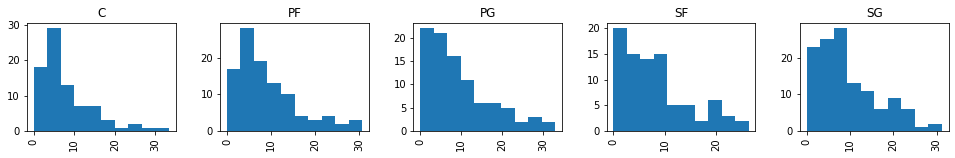

In [26]:
#Pandas's built-in: hist()
PTS_byPOC['PTS'].hist(by=PTS_byPOC['Pos'], layout=(1,5), figsize=(16,2))
#adjust the layout to be 1 row, 5 columns, figure size to be 16 by 2

## 2. Seaborn + plt.hist()

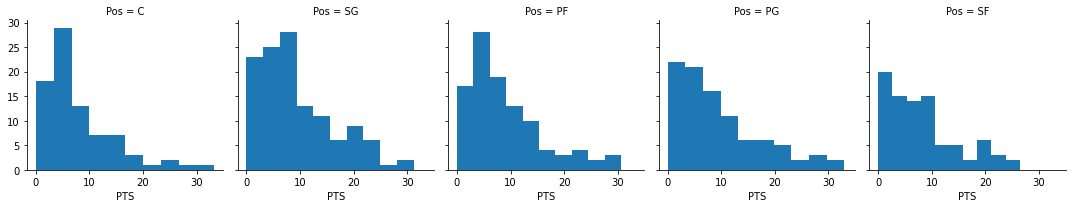

In [29]:
#using seaborn for visualization
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(PTS_byPOC, col="Pos")#col="Pos" is to separate by position
g.map(plt.hist, "PTS");

## 3. pandas.boxplot() + sns.boxplot()

<AxesSubplot:title={'center':'PTS'}, xlabel='Pos'>

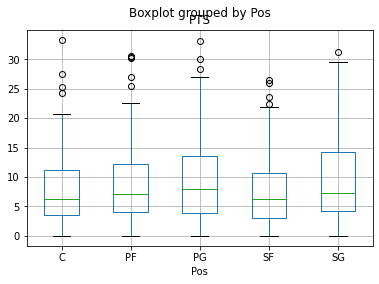

In [30]:
# Boxplot: Pandas built-in function
PTS_byPOC.boxplot(column='PTS', by='Pos')#separated by position

We could see that PG has the highest median (the green line), and PG, SG have wide IQR. But with boxplot, we cannot tell if the distribution of the data is centered about two points or pretty much spread even across the data range.

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

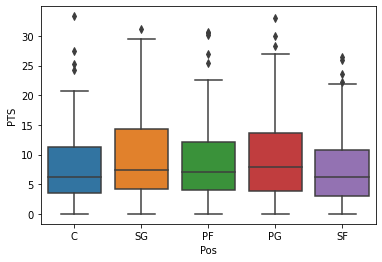

In [31]:
#seaborn
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS_byPOC) 

### 3.2 Draw a categorical scatterplot using jitter to reduce overplotting.

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

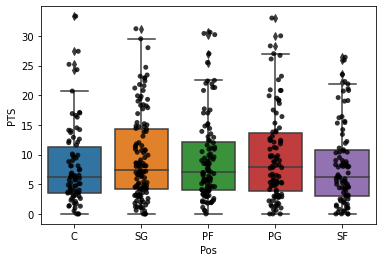

In [32]:
#seaborn with distribution
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS_byPOC) 
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS_byPOC,
              jitter=True, #jitter=True so that it would randomize the number wouldn't overlap that much
              marker='o',
              alpha=0.8, 
              color="black")

## 4. Heatmap: Compute the correlation matrix

In [34]:
corr = df.corr()
corr

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.159212,0.132842,0.194853,0.135578,0.135118,0.047399,0.185041,0.169569,0.162367,...,0.153684,0.018400,0.151052,0.122201,0.201639,0.108195,0.051617,0.123253,0.125946,0.143828
G,0.159212,1.000000,0.570841,0.660387,0.507420,0.496108,0.260711,0.404251,0.400758,0.357281,...,0.519808,0.365290,0.519771,0.511673,0.351256,0.430231,0.353793,0.444628,0.544504,0.498598
GS,0.132842,0.570841,1.000000,0.823201,0.750011,0.735711,0.158568,0.522024,0.534361,0.199406,...,0.299869,0.416423,0.682113,0.653046,0.586519,0.567224,0.407292,0.679665,0.625034,0.739703
MP,0.194853,0.660387,0.823201,1.000000,0.881848,0.888401,0.198635,0.703420,0.724868,0.374459,...,0.495737,0.393880,0.762198,0.707191,0.729320,0.724105,0.412853,0.806826,0.750508,0.877189
FG,0.135578,0.507420,0.750011,0.881848,1.000000,0.976114,0.245691,0.691450,0.708847,0.311145,...,0.404055,0.354035,0.747384,0.683531,0.729027,0.616654,0.383947,0.862424,0.619378,0.992162
FGA,0.135118,0.496108,0.735711,0.888401,0.976114,1.000000,0.116540,0.768988,0.805842,0.333850,...,0.423885,0.244066,0.678435,0.596683,0.758266,0.634572,0.290134,0.863502,0.584299,0.979949
FG%,0.047399,0.260711,0.158568,0.198635,0.245691,0.116540,1.000000,-0.022010,-0.085137,0.166674,...,0.224011,0.401236,0.306384,0.359615,0.057893,0.082793,0.333482,0.132358,0.272159,0.207548
3P,0.185041,0.404251,0.522024,0.703420,0.691450,0.768988,-0.022010,1.000000,0.976878,0.537465,...,0.399525,-0.102365,0.349097,0.237383,0.551257,0.487866,0.045615,0.569259,0.367586,0.728648
3PA,0.169569,0.400758,0.534361,0.724868,0.708847,0.805842,-0.085137,0.976878,1.000000,0.465664,...,0.402237,-0.104670,0.365084,0.248687,0.586937,0.513331,0.038251,0.607054,0.380224,0.745555
3P%,0.162367,0.357281,0.199406,0.374459,0.311145,0.333850,0.166674,0.537465,0.465664,1.000000,...,0.350987,-0.126132,0.150412,0.076443,0.255430,0.270977,-0.013835,0.241928,0.203165,0.332980


<AxesSubplot:>

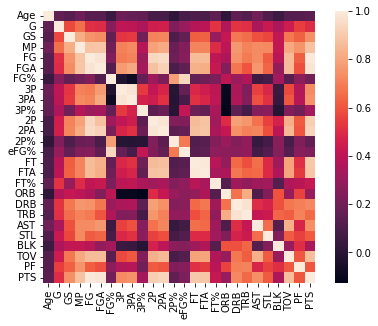

In [36]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

The white diagnoial line indicates a correlation, coefficient of 1, and red as 0.5

'mask=dataframe or = True: If passed, data will not be shown in cells where mask is True. Cells with missing values are automatically masked.\n If my goal was to build a model to predict the brand of a car based on its unique features, I may have to remove one or more of these three variables in order to optimize my model and prevent multicolinearity.\n'

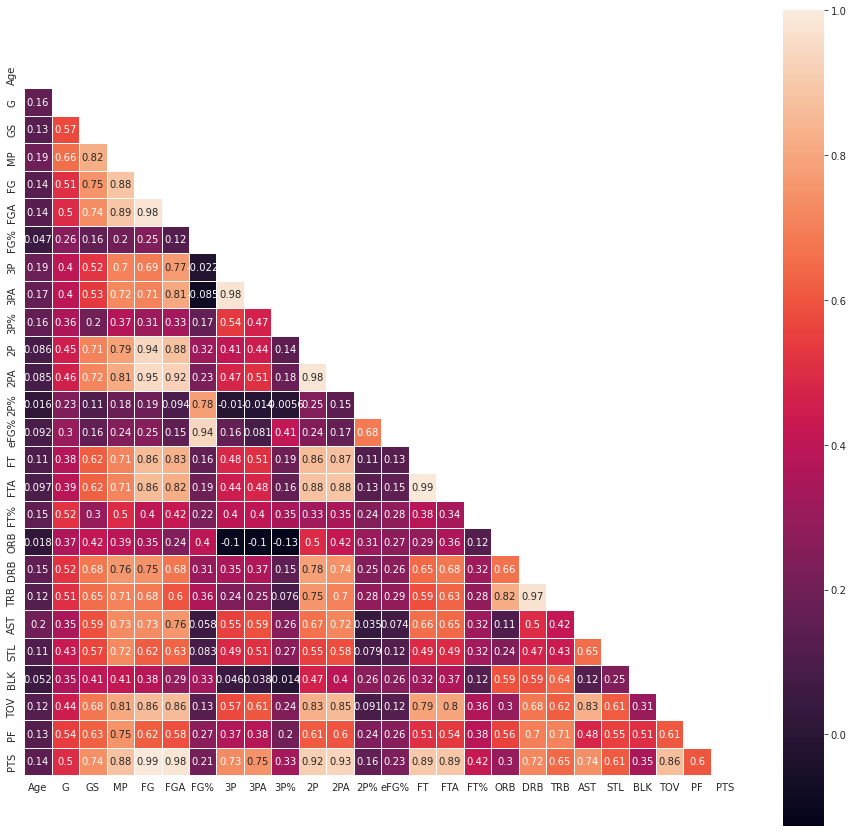

In [48]:
#Mask diagonal half of heat map (Diagonal correlation matrix)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True #Return the indices for the upper-triangle of arr
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, annot=True, linewidth=.5)
'''mask=dataframe or = True: If passed, data will not be shown in cells where mask is True. Cells with missing values are automatically masked.
 If my goal was to build a model to predict the brand of a car based on its unique features, I may have to remove one or more of these three variables in order to optimize my model and prevent multicolinearity.
'''

## 5. Scatter Plot

In [41]:
# subset to numeric only variables 
number = df.select_dtypes(include=['number']);
number.iloc[:4,:5]

,Age,G,GS,MP,FG
0,23,12,0,20.4,3.0
1,29,26,26,26.5,3.6
2,25,28,28,35.0,8.1
3,22,13,0,8.8,1.2


In [42]:
#subset to the first 5 and pts columns
selections = ['Age', 'G', 'GS', 'MP', 'FG', 'PTS']
df5 = df[selections]
df5

,Age,G,GS,MP,FG,PTS
0,23,12,0,20.4,3.0,8.8
1,29,26,26,26.5,3.6,8.1
2,25,28,28,35.0,8.1,20.7
3,22,13,0,8.8,1.2,3.1
4,22,28,16,24.5,3.5,10.1
...,...,...,...,...,...,...
485,30,4,0,22.8,2.5,6.5
486,24,2,0,4.0,0.5,1.0
487,34,27,9,17.2,2.3,5.1
488,24,27,27,35.7,8.7,27.0


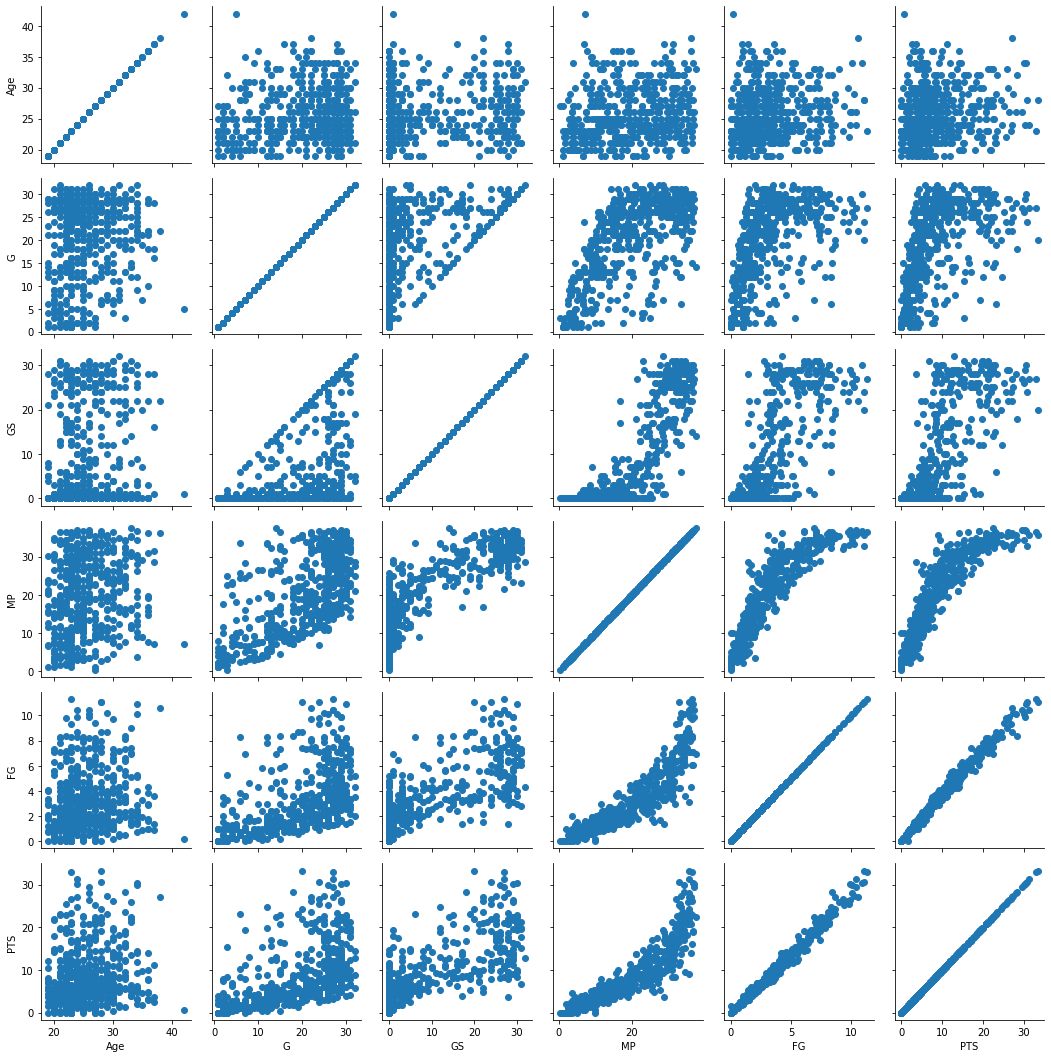

In [43]:
g = sns.PairGrid(df5)
g.map(plt.scatter);

In [ ]:
# g = sns.PairGrid(number)
# g.map(plt.scatter);

Reference:
1. [GeeksforGeeks. Cat command](https://www.geeksforgeeks.org/using-the-cat-command-in-python/)
2. [GeeksforGeeks. Add columns to df](https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/)
3. [Digitalocean. 3 ways to easily create a subset of Python](https://www.digitalocean.com/community/tutorials/create-subset-of-python-dataframe)
4. [Justinsighting. How to interpret boxplot](https://justinsighting.com/how-to-interpret-box-plots/#:~:text=A%20box%20plot%20gives%20us%20a%20basic%20idea,of%20the%204%20sections%20of%20the%20box%20plot.)
5. [Data Professor. Exploratory Data Analysis in Python using pandas](https://www.youtube.com/watch?v=9m4n2xVzk9o&list=PLtqF5YXg7GLltQSLKSTnwCcHqTZASedbO&index=14)
6. [Seaborn. sns.stripplot documentation](https://seaborn.pydata.org/generated/seaborn.stripplot.html)
7. [Medium. 5min Heatmap](https://medium.com/5-minute-eda/5-minute-eda-correlation-heatmap-b57bbb7bae14)
8. [Seaborn. sns.heatmap documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)